# Building Data
In this demo we are going to go through the process of building a custom dataset to use to train our model.

This is an example process of building data to use for model training.

We will cover some new concepts and best practices as well as review some concepts we have learned over the last few lessons.



# Data Cleaning and preprocessing
Data cleaning and preprocessing help make sure that only clear, useful images are used to train the model, which leads to better accuracy. These steps remove any messy or confusing data so the model can learn patterns more easily.

This is no right or wrong way to do this but it is important to examine the data.

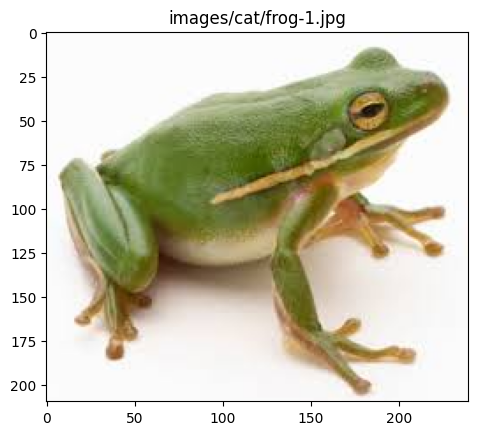

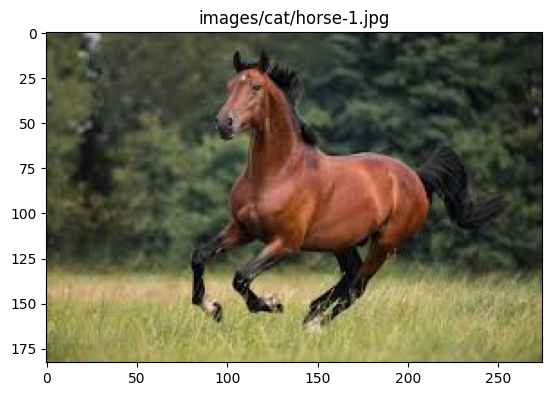

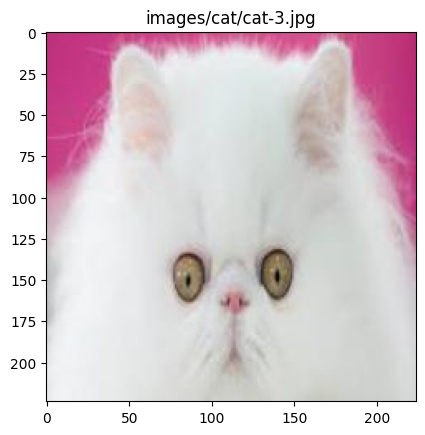

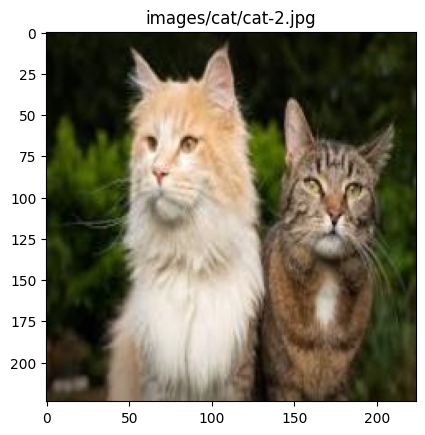

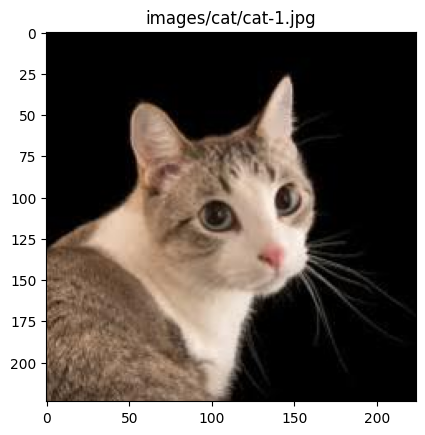

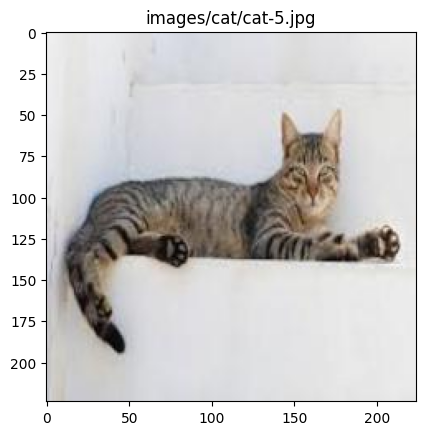

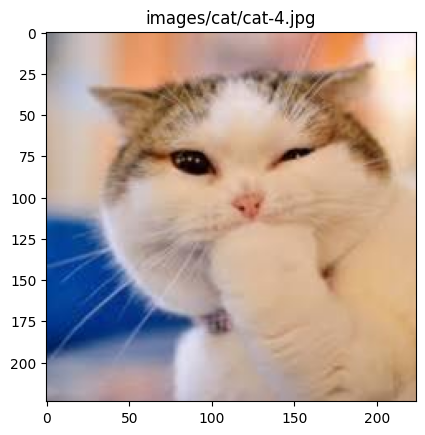

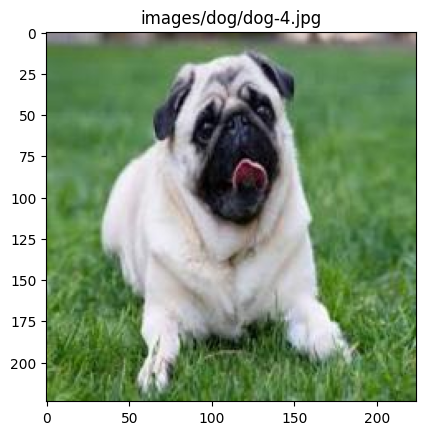

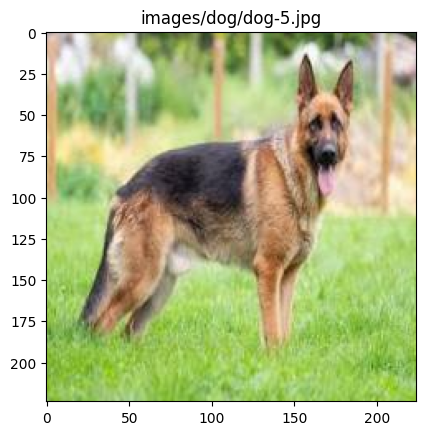

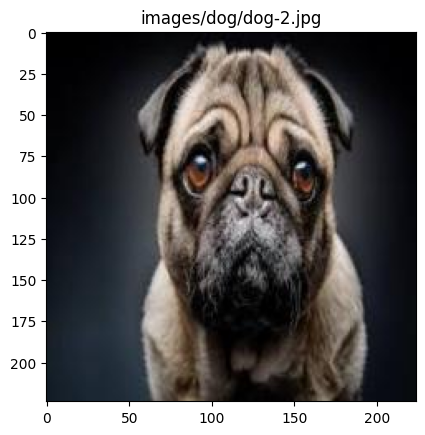

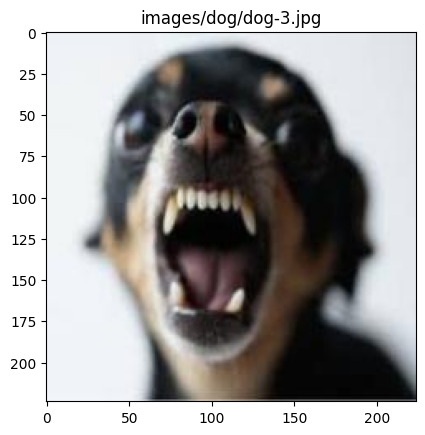

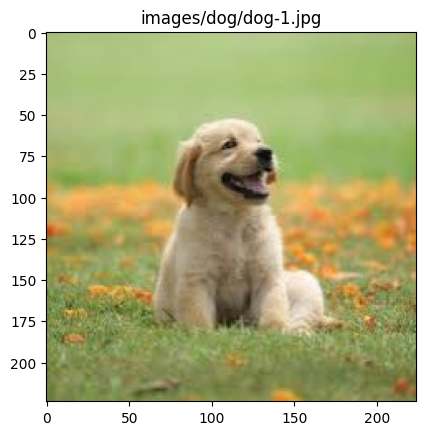

In [224]:
# View all images in our dataset
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Get a list of images with jpg
images_list = glob.glob("images/*/*jpg")

# Open each image
for image in images_list:
    # Set the title
    plt.title(image)
    # Open the image
    img = Image.open(image)
    plt.axis("on")
    plt.imshow(img)
    plt.show()



In [225]:
# Print our image list
print(images_list)

['images/cat/frog-1.jpg', 'images/cat/horse-1.jpg', 'images/cat/cat-3.jpg', 'images/cat/cat-2.jpg', 'images/cat/cat-1.jpg', 'images/cat/cat-5.jpg', 'images/cat/cat-4.jpg', 'images/dog/dog-4.jpg', 'images/dog/dog-5.jpg', 'images/dog/dog-2.jpg', 'images/dog/dog-3.jpg', 'images/dog/dog-1.jpg']


In [226]:
# Remove images from our list that we dont want
images_list.remove('images/cat/frog-1.jpg')

In [227]:
images_list.remove('images/cat/horse-1.jpg')

In [228]:
# We are using an annotations file lets write the final list to a csv with its class
import os
import pandas as pd

data = []

for file_path in images_list:
    # Extract the class label from the path ie: dog or cat
    label = os.path.basename(os.path.dirname(file_path))
    # Append path and label 
    data.append({"file_path": file_path, "label": label})

# Save DF as CSV file
df = pd.DataFrame(data)
df.to_csv("image_data.csv", index=False)

# Here we created our intitial annotations file


### Create an initial PyTorch Dataset
Once our data is cleaned up and ready, we need to create an initial Dataset that consists of all eligible images.

This is so we can split our data into Training, Validation and Testing subsets.

In [229]:
import pandas as pd
from torch.utils.data import Dataset


class InitialDataset(Dataset):
    def __init__(self, annotations_file):
        self.img_labels = pd.read_csv(annotations_file)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx, 0]
        label = self.img_labels.iloc[idx, 1]
        return img_path, label

In [230]:
# Create a PyTorch Dataset
dataset = InitialDataset(annotations_file='image_data.csv')

In [231]:
# Print the annoations
dataset.img_labels

,file_path,label
0,images/cat/cat-3.jpg,cat
1,images/cat/cat-2.jpg,cat
2,images/cat/cat-1.jpg,cat
3,images/cat/cat-5.jpg,cat
4,images/cat/cat-4.jpg,cat
5,images/dog/dog-4.jpg,dog
6,images/dog/dog-5.jpg,dog
7,images/dog/dog-2.jpg,dog
8,images/dog/dog-3.jpg,dog
9,images/dog/dog-1.jpg,dog


# Random Split
Review:

The `random_split` function in PyTorch helps divide your dataset into different parts such as training, validation and testin sets, by randomly selecting samples for each part. 

This is important because splitting data lets you train the model on one part and test it on another, helping you see how well the model performs on new, unseen data. 

Randomly splitting the data ensures each set has a good mix, making the model’s evaluation more reliable.

Data Splits:

**Training data** is the largest portion, and it’s what the model learns from by finding patterns in the data. 

**Validation data** is used during training to tune the model’s settings, helping prevent overfitting so the model doesn’t just memorize the training data. 

**Testing data** is used after training to check how well the model performs on completely new data. This setup ensures the model can make accurate predictions on data it hasn’t seen before, making it more useful and reliable.

In [232]:
# Import random_split from PyTorch's data utilities
from torch.utils.data import random_split

In [233]:
# Define size of Training data from the full dataset 70%
train_size = int(0.7 * len(dataset))

In [234]:
# Define size of Validation data from the full dataset 15%
val_size = int(0.15 * len(dataset))

In [235]:
# Finally define the rest as test data 15%
test_size = len(dataset) - train_size - val_size

In [236]:
# Create a training, validation and testing dataset by splitting the full dataset by size
# Here we use random_split
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [237]:
# Take a look at the outputs we get from the subsets
print(train_dataset.indices, val_dataset.indices, test_dataset.indices)

[0, 3, 6, 9, 7, 5, 2] [4] [1, 8]


The output of `random_split` PyTorch is a list of Subset objects, each representing a portion of the original dataset.

We can use these lists of indexes to retrieve samples from our original dataset. 

In [238]:
# Compare the original dataset to our index
# Print the annotations
dataset.img_labels

,file_path,label
0,images/cat/cat-3.jpg,cat
1,images/cat/cat-2.jpg,cat
2,images/cat/cat-1.jpg,cat
3,images/cat/cat-5.jpg,cat
4,images/cat/cat-4.jpg,cat
5,images/dog/dog-4.jpg,dog
6,images/dog/dog-5.jpg,dog
7,images/dog/dog-2.jpg,dog
8,images/dog/dog-3.jpg,dog
9,images/dog/dog-1.jpg,dog


In [239]:
# Print the item in the dataset at the first index of the train_dataset
dataset.img_labels.loc[train_dataset.indices[0]]
# We can do the same for other indexes and for validation datasets and testing datasets

file_path    images/cat/cat-3.jpg
label                         cat
Name: 0, dtype: object

# Data Versioning and Tracking
As we covered in the video, there are multiple ways to version your data and we wont cover any particular method in this course.

However, the reason we are covering this is because it is a best practice.

Versioning and tracking makes your work more reliable and allows you to reproduce results consistently, even if the data changes over time. 

In [240]:
# Lets write annotation files for each of our subsets of data. 
# This method can be used for other forms of model training outside of images such as text, audio, etc
import pandas as pd

data = []

# For each index in the training indices 
for idx in train_dataset.indices:
    # Extract the file_path and the label from the original dataset 
    img_path = dataset.img_labels['file_path'].loc[idx]
    label = dataset.img_labels['label'].loc[idx]
    # Append path and label 
    data.append({"file_path": img_path, "label": label})

# Save DF as CSV file
df = pd.DataFrame(data)
df.to_csv("training_data.csv", index=False)

In [241]:
# Do the same thing for our validation and testing sets.
import pandas as pd

data = []

# For each index in the validation indices 
for idx in val_dataset.indices:
    # Extract the file_path and the label from the original dataset 
    img_path = dataset.img_labels['file_path'].loc[idx]
    label = dataset.img_labels['label'].loc[idx]
    # Append path and label 
    data.append({"file_path": img_path, "label": label})

# Save DF as CSV file
df = pd.DataFrame(data)
df.to_csv("validation_data.csv", index=False)

# For each index in the test indices 
for idx in test_dataset.indices:
    # Extract the file_path and the label from the original dataset 
    img_path = dataset.img_labels['file_path'].loc[idx]
    label = dataset.img_labels['label'].loc[idx]
    # Append path and label 
    data.append({"file_path": img_path, "label": label})

# Save DF as CSV file
df = pd.DataFrame(data)
df.to_csv("testing_data.csv", index=False)

# Define Transformations
Lets go ahead and define transformations for our subsets of data. 

Remember that there is a possibility that training could have different transforms than validation. This is present a more diverse sample to the model during training.

In [242]:
# Begin by import transforms
from torchvision.transforms import v2

In [243]:
# Training Pipeline
import torch

train_transform = v2.Compose([
    v2.Resize((128, 128)), # Resize the image
    v2.RandomCrop(size=(75, 75)), # Random Crop
    v2.RandomHorizontalFlip(p=.7), # Randomly flip horizontally
    # Convert to tensor
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize
])

In [244]:
# Validation Pipeline
val_transform = v2.Compose([
    v2.Resize((128, 128)), # Resize to a fixed size
    # Convert to tensor
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize
])

# Define Datasets and DataLoaders
Now that we have subsets of our data and individual transformations, we can create PyTorch Datasets from our subsets of data and DataLoaders for those subsets to load them into our model.

In [245]:
# Lets begin by defining our Custom Dataset 
import pandas as pd


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform, target_transform):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = lambda y: target_transform[y]

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path)
        label = self.img_labels.iloc[idx, 1]
        # Transform the image
        image = self.transform(image)
        # Get the label
        label = self.target_transform(label)
        
        return image, label

In [246]:
# Create the label encoding
label_encoding = {"cat": 0, "dog": 1}

In [247]:
# Create a training dataset 
train_dataset = CustomImageDataset(
    annotations_file='training_data.csv', 
    img_dir="./", 
    transform=train_transform, 
    target_transform=label_encoding
)

In [248]:
# Display the training data
train_dataset.img_labels

,file_path,label
0,images/cat/cat-3.jpg,cat
1,images/cat/cat-5.jpg,cat
2,images/dog/dog-5.jpg,dog
3,images/dog/dog-1.jpg,dog
4,images/dog/dog-2.jpg,dog
5,images/dog/dog-4.jpg,dog
6,images/cat/cat-1.jpg,cat


In [249]:

# Label encoding
train_dataset.target_transform('dog')

1

In [250]:
# Transformations
train_dataset.transform

Compose(
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      RandomCrop(size=(75, 75), pad_if_needed=False, fill=0, padding_mode=constant)
      RandomHorizontalFlip(p=0.7)
      ToImage()
      ToDtype(scale=True)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)

In [251]:
# Create the validation dataset
val_dataset = CustomImageDataset(
    annotations_file='validation_data.csv', 
    img_dir="./", 
    transform=val_transform, 
    target_transform=label_encoding
)

In [252]:
# Show the transforms
val_dataset.transform

Compose(
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToImage()
      ToDtype(scale=True)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)

In [253]:
# Create the DataLoaders for each PyTorch Dataset
# Import DataLoader
from torch.utils.data import DataLoader


In [254]:
# Create the training DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [255]:
# Iterate through and print the batch size
features, labels = next(iter(train_loader))
print(f"Features shape: {features.size()}")

Features shape: torch.Size([7, 3, 75, 75])


In [256]:
# Create the Validation DataLoader NOTICE the False shuffle
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [257]:
# Iterate 
features, labels = next(iter(val_loader))
print(f"Features shape: {features.size()}")

Features shape: torch.Size([1, 3, 128, 128])


#### we are now ready to begin training a model!